# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Saving cat.jpeg to cat (2).jpeg
Image loaded successfully! Shape: (224, 225)


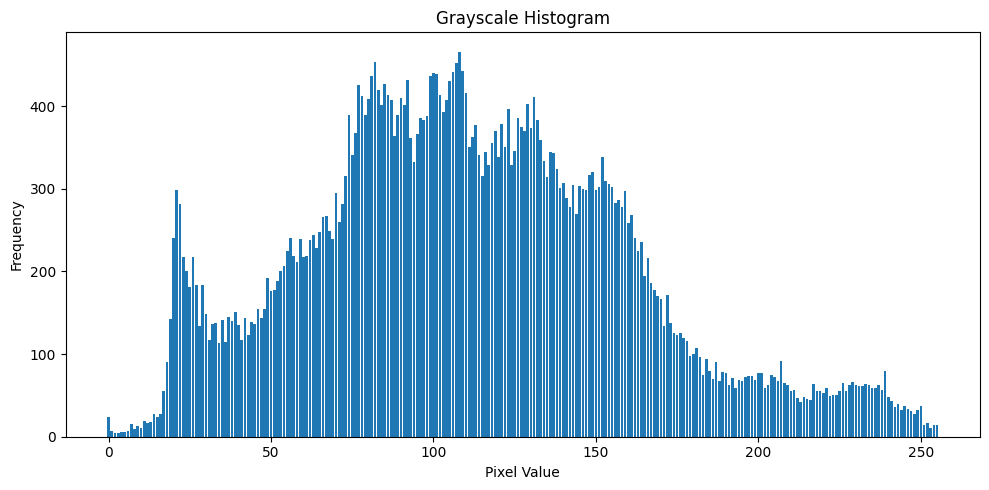

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image as grayscale
gray_img = cv2.imread(filename, 0)
def gray_histogram(gray_img):
        hist = np.zeros(256, dtype=int)

        for i in range(gray_img.shape[0]):
            for j in range(gray_img.shape[1]):
                pixel = int(gray_img[i, j])
                hist[pixel] += 1

        return hist

    # Calculate histogram
        hist = gray_histogram(gray_img)

    # Create and display plot
        plt.figure(figsize=(10, 5))
        plt.bar(np.arange(256), hist)
        plt.title("Grayscale Histogram")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


In [21]:
def rgb_histogram(rgb_img):
    """
    Computes RGB histogram using pure NumPy loops.
    rgb_img: H x W x 3 (values 0–255)
    Returns: hist_R, hist_G, hist_B (each of size 256)
    """
    hist_R = np.zeros(256, dtype=int)
    hist_G = np.zeros(256, dtype=int)
    hist_B = np.zeros(256, dtype=int)

    H, W, _ = rgb_img.shape

    # pure loops
    for i in range(H):
        for j in range(W):
            r, g, b = rgb_img[i, j]

            hist_R[r] += 1
            hist_G[g] += 1
            hist_B[b] += 1

    return hist_R, hist_G, hist_B


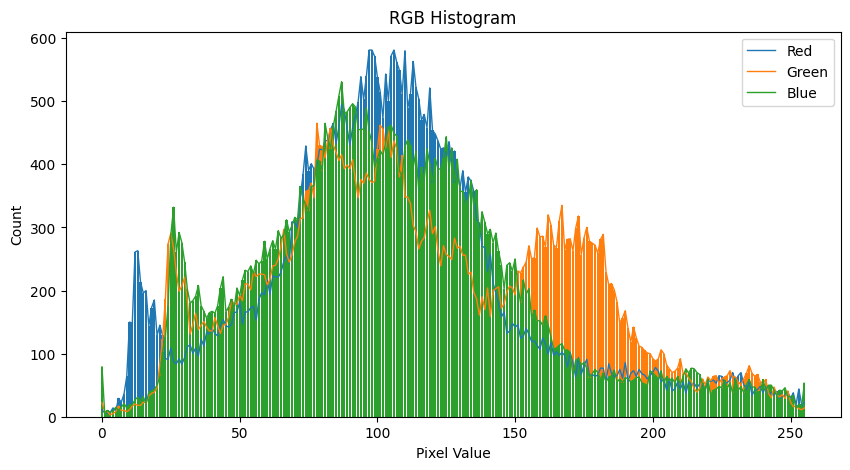

In [23]:
rgb_img = cv2.imread(filename)        # loads BGR
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)   # convert to RGB
hist_R, hist_G, hist_B = rgb_histogram(rgb_img)

plt.figure(figsize=(10,5))
plt.bar(np.arange(256), hist_R)
plt.bar(np.arange(256), hist_G)
plt.bar(np.arange(256), hist_B)
plt.plot(hist_R, label="Red", linewidth=1)
plt.plot(hist_G, label="Green", linewidth=1)
plt.plot(hist_B, label="Blue", linewidth=1)

plt.title("RGB Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.legend()
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

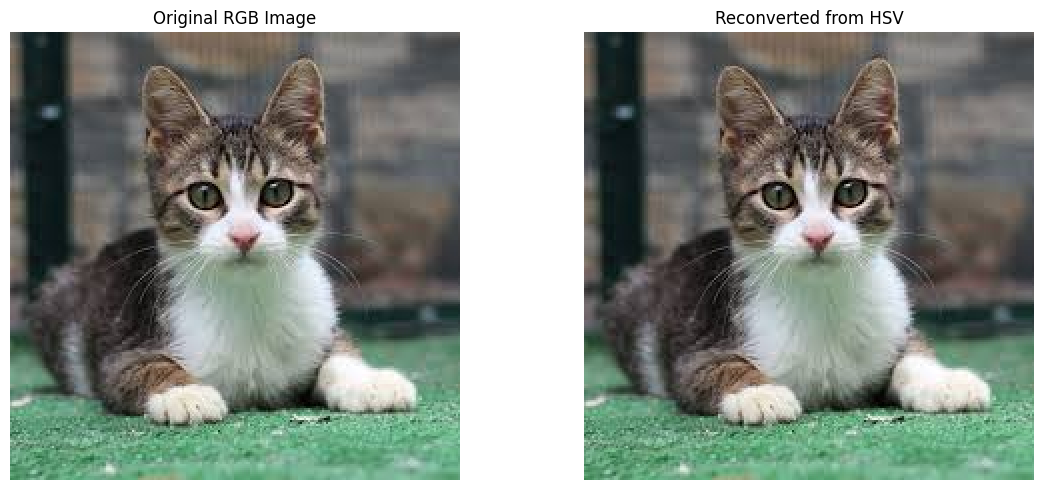

Max difference: 4.0
Mean difference: 0.2678108513355255


In [29]:
def rgb_hsv(rgb_img):
    H, W, _ = rgb_img.shape
    hsv_img = np.zeros((H, W, 3), dtype=np.uint8)

    for i in range(H):
        for j in range(W):
            R, G, B = rgb_img[i, j]

            # Normalize to [0, 1]
            r = R / 255.0
            g = G / 255.0
            b = B / 255.0

            maxc = max(r, g, b)
            minc = min(r, g, b)
            delta = maxc - minc

            # Value: [0, 1]
            v = maxc

            # Saturation: [0, 1]
            if maxc == 0:
                s = 0
            else:
                s = delta / maxc

            # Hue: [0, 360]
            if delta == 0:
                H_val = 0
            elif maxc == r:
                H_val = (60 * ((g - b) / delta)) % 360
            elif maxc == g:
                H_val = 60 * (2 + (b - r) / delta)
            else:  # maxc == b
                H_val = 60 * (4 + (r - g) / delta)

            # CORRECTED: Convert to OpenCV format
            # H: [0, 360] -> [0, 179]  as open cv uses value till 180 degrees
            # S: [0, 1] -> [0, 255]
            # V: [0, 1] -> [0, 255]
            h_opencv = int(H_val * 179 / 360)
            s255 = int(s * 255)
            v255 = int(v * 255)

            hsv_img[i, j] = [h_opencv, s255, v255]

    return hsv_img


# Test the function
hsv_img = rgb_hsv(rgb_img)

# Convert back to RGB using OpenCV
rgb_recovered = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_recovered)
plt.title("Reconverted from HSV")
plt.axis("off")

plt.tight_layout()
plt.show()




## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

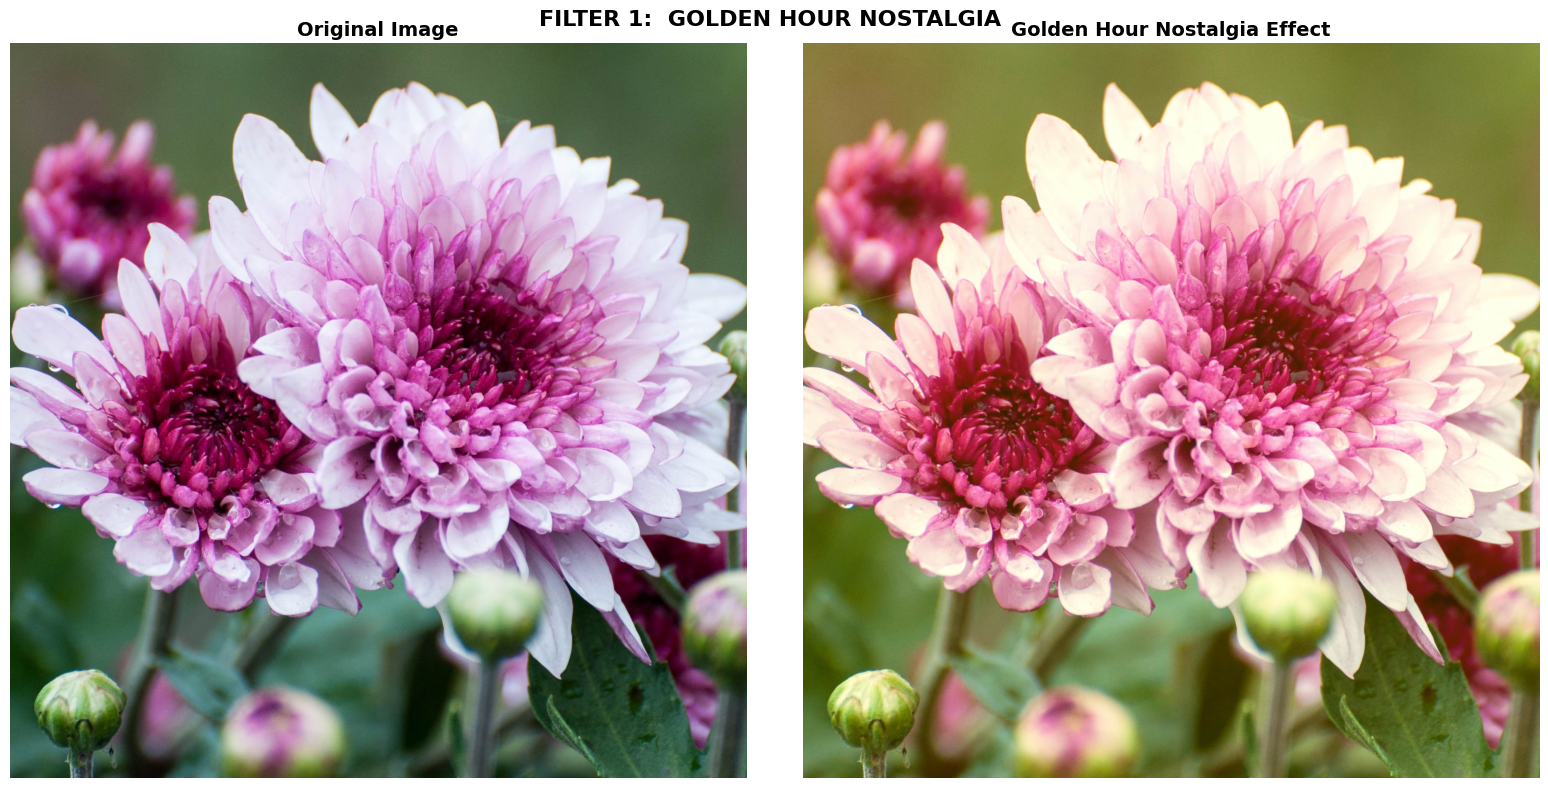

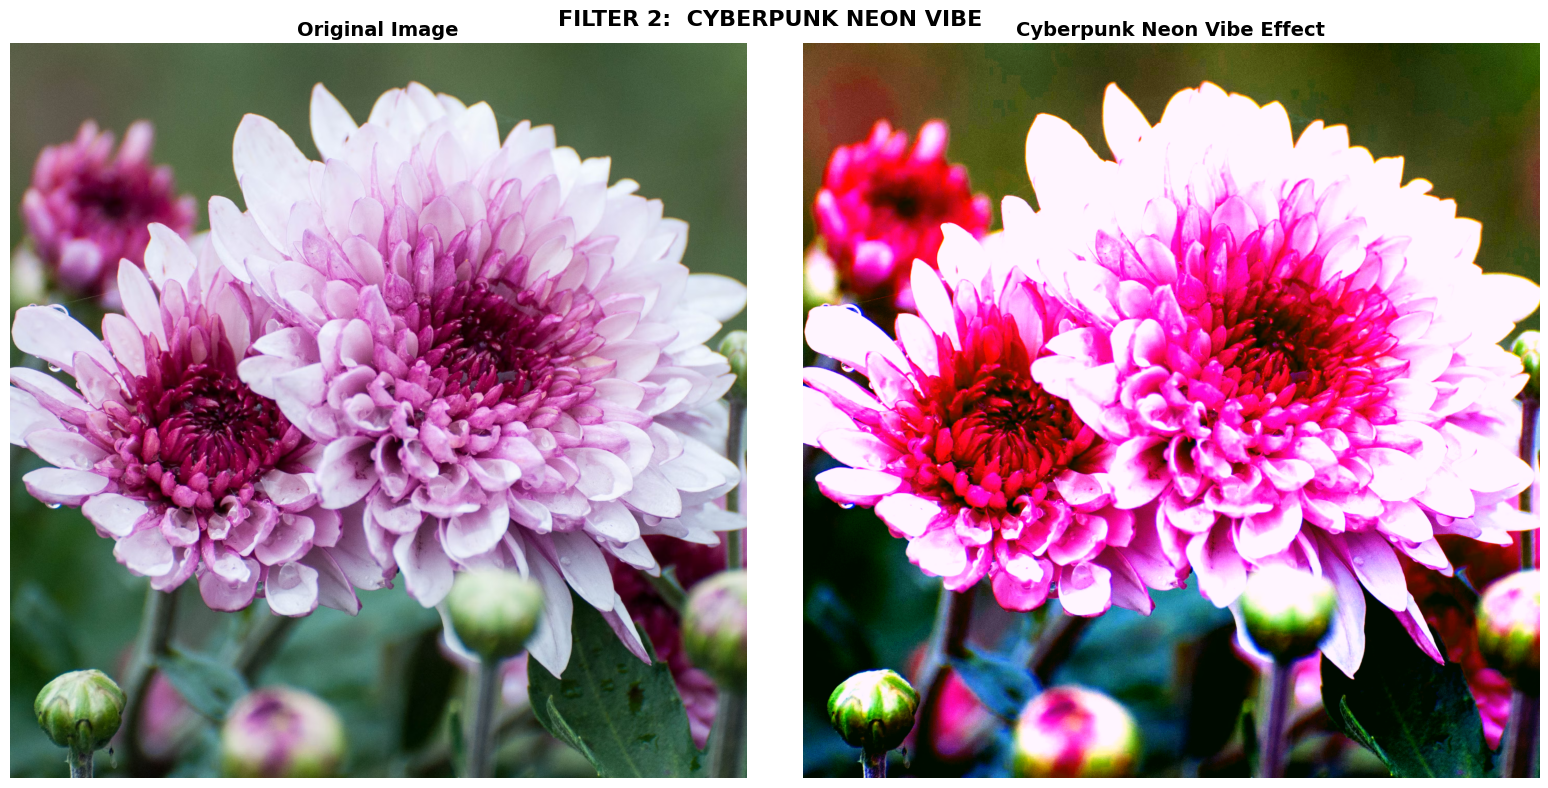

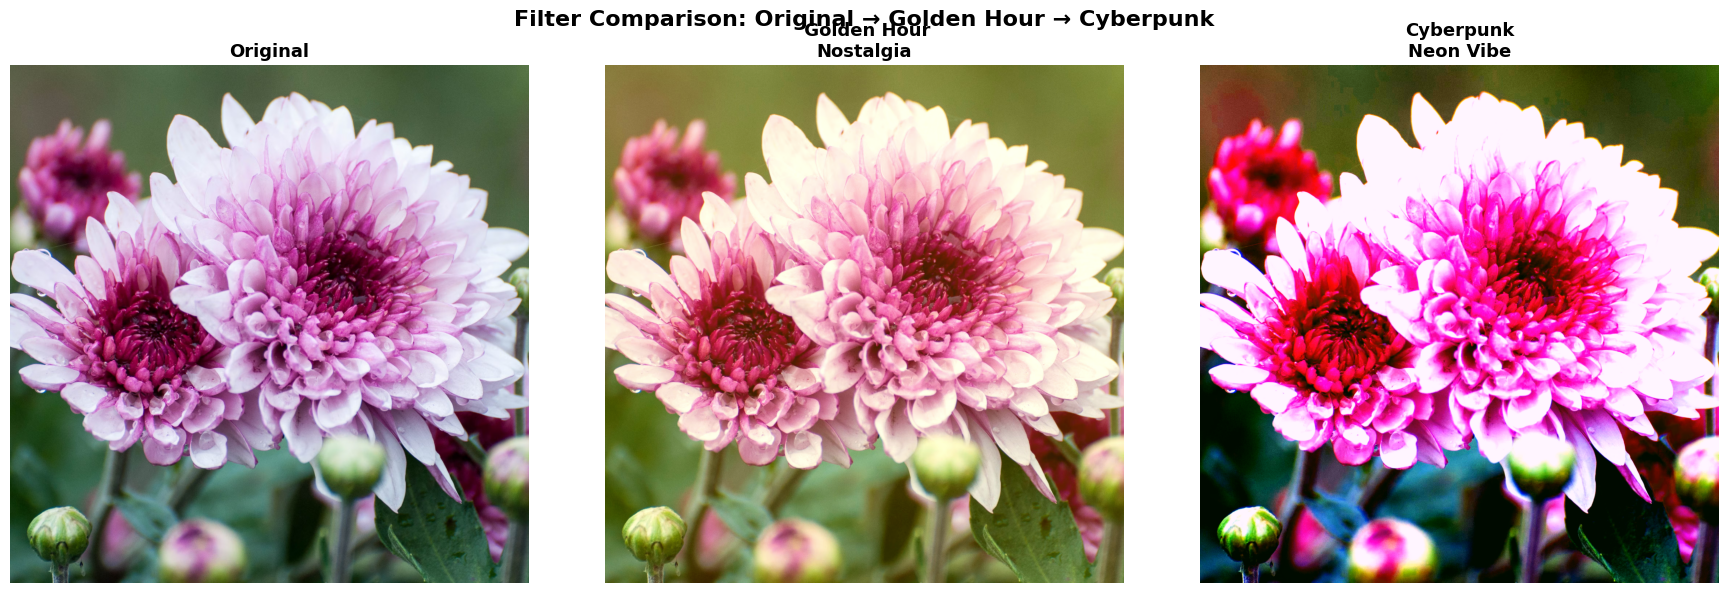

In [5]:



# FILTER 1: "GOLDEN HOUR NOSTALGIA"

def golden_hour_nostalgia(img_rgb, strength=1.0):
    """
     GOLDEN HOUR NOSTALGIA FILTER

    Creates a warm, vintage aesthetic reminiscent of golden hour photography
    with film-like characteristics.

    Color Modifications Implemented:
     WARM COLOR TINT: Adds golden-yellow cast to entire image
     SATURATION BOOST: Increased vibrance in mid-tones
     CONTRAST ENHANCEMENT: Lifted blacks for vintage film feel
      GAMMA ADJUSTMENT: Brightens shadows naturally


    Best for: Landscape photos, sunset scenes, vintage portraits, travel photography
    """
    img_float = img_rgb.astype(np.float32) / 255.0

    # ---- 1. WARM COLOR TINT ----
    # Add golden-yellow cast: boost Red and Green, reduce Blue slightly
    img_float[:, :, 0] += 0.15 * strength  # Red channel +
    img_float[:, :, 1] += 0.08 * strength  # Green channel + (less than red)
    img_float[:, :, 2] -= 0.05 * strength  # Blue channel -



    # Warm highlights stay warm (already boosted)

    #  SATURATION BOOST (Vibrance-like)
    # Convert to HSV for saturation adjustment
    rgb_clip = np.clip(img_float, 0, 1)
    hsv = cv2.cvtColor((rgb_clip * 255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)

    # Selective saturation: boost less saturated colors more
    saturation = hsv[:, :, 1] / 255.0
    sat_boost = (1 - saturation) * 0.3 * strength  # Stronger boost for muted colors
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * (1 + sat_boost), 0, 255)

    img_float = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0

    # CONTRAST ENHANCEMENT

    mean_brightness = np.mean(img_float)
    img_float = mean_brightness + (img_float - mean_brightness) * (0.8 + 0.2 * strength)

    #  GAMMA CORRECTION
    # Apply gamma ~1.15 to brighten shadows naturally
    gamma = 1.15
    img_float = np.power(np.clip(img_float, 0, 1), 1/gamma)


    # Subtle cross-channel mixing for film-like quality
    r, g, b = img_float[:, :, 0], img_float[:, :, 1], img_float[:, :, 2]
    r_new = r * 0.95 + g * 0.03 + b * 0.02
    g_new = r * 0.02 + g * 0.98 + b * 0.00
    b_new = r * 0.01 + g * 0.02 + b * 0.97

    img_float = np.stack([r_new, g_new, b_new], axis=2)

    # Clip and convert to uint8
    result = (np.clip(img_float, 0, 1) * 255).astype(np.uint8)
    return result


# FILTER 2: "CYBERPUNK NEON VIBE"

def cyberpunk_neon_vibe(img_rgb, strength=1.0):
    """
    CYBERPUNK NEON VIBE FILTER

    Creates a high-contrast, ultra-saturated cyberpunk aesthetic with
    neon color separation and dark moody shadows.

    Color Modifications Implemented:
    1. EXTREME SATURATION BOOST: Pushes colors to maximum vibrancy
    2. SPLIT-TONING: Magenta shadows + Cyan-Yellow highlights
    3. CONTRAST EXPLOSION: Heavy S-curve for dramatic punch
    4. HUE SHIFT: Slight color rotation for neon effect


    Best for: Night scenes, urban photography, architecture, dramatic portraits,
              synthetic/surreal images, sci-fi themed photos
    """
    img_float = img_rgb.astype(np.float32) / 255.0

    # EXTREME SATURATION BOOST
    hsv = cv2.cvtColor((img_float * 255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    # Boost saturation aggressively
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * (1.4 + 0.3 * strength), 0, 255)
    img_float = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0

    #  SPLIT-TONING (Magenta shadows + Cyan-Yellow highlights)
    brightness = np.mean(img_float, axis=2)
    shadow_mask = (1 - brightness) ** 1.3
    highlight_mask = brightness ** 1.3

    # Magenta in shadows (Red + Blue)
    img_float[:, :, 0] += 0.18 * shadow_mask * strength  # Red boost
    img_float[:, :, 2] += 0.15 * shadow_mask * strength  # Blue boost (magenta)
    img_float[:, :, 1] -= 0.08 * shadow_mask * strength  # Green reduction

    # Cyan-Yellow in highlights (boost all except reduce green for cyan)
    img_float[:, :, 0] += 0.10 * highlight_mask * strength  # Red
    img_float[:, :, 1] += 0.12 * highlight_mask * strength  # Green
    img_float[:, :, 2] += 0.08 * highlight_mask * strength  # Blue

    #  CONTRAST EXPLOSION
    # S-curve contrast enhancement
    img_float = np.clip(img_float, 0, 1)
    # Apply S-curve: darkens darks, brightens brights
    img_float = 3 * img_float**2 - 2 * img_float**3 + (strength * 0.3) * (img_float - 0.5)

    # HUE SHIFT
    # Subtle hue rotation for neon effect
    hsv = cv2.cvtColor((np.clip(img_float, 0, 1) * 255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 0] = (hsv[:, :, 0] + 5 * strength) % 180  # Rotate hue slightly
    img_float = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0

    # CHANNEL SEPARATION
    # Increase difference between RGB channels for neon look
    r, g, b = img_float[:, :, 0], img_float[:, :, 1], img_float[:, :, 2]

    # Push channels apart
    channel_separation = 0.15 * strength
    r_new = r + channel_separation * (r - np.mean(img_float))
    g_new = g - channel_separation * 0.5 * (g - np.mean(img_float))
    b_new = b + channel_separation * (b - np.mean(img_float))

    img_float = np.stack([r_new, g_new, b_new], axis=2)


    # Final clip and convert
    result = (np.clip(img_float, 0, 1) * 255).astype(np.uint8)
    return result



# UPLOAD AND TEST







# Apply filters with optimal strength
golden_img = golden_hour_nostalgia(rgb_img, strength=1.0)
cyberpunk_img = cyberpunk_neon_vibe(rgb_img, strength=1.0)

# DISPLAY: Original vs Golden Hour Nostalgia

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("FILTER 1:  GOLDEN HOUR NOSTALGIA ", fontsize=16, fontweight='bold')

axes[0].imshow(rgb_img)
axes[0].set_title("Original Image", fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(golden_img)
axes[1].set_title("Golden Hour Nostalgia Effect", fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# DISPLAY: Original vs Cyberpunk Neon Vibe

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("FILTER 2:  CYBERPUNK NEON VIBE ", fontsize=16, fontweight='bold')

axes[0].imshow(rgb_img)
axes[0].set_title("Original Image", fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(cyberpunk_img)
axes[1].set_title("Cyberpunk Neon Vibe Effect", fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# SIDE-BY-SIDE COMPARISON: Both Filters

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Filter Comparison: Original → Golden Hour → Cyberpunk", fontsize=16, fontweight='bold')

axes[0].imshow(rgb_img)
axes[0].set_title("Original", fontsize=13, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(golden_img)
axes[1].set_title(" Golden Hour\nNostalgia", fontsize=13, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(cyberpunk_img)
axes[2].set_title("Cyberpunk\nNeon Vibe", fontsize=13, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()





## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

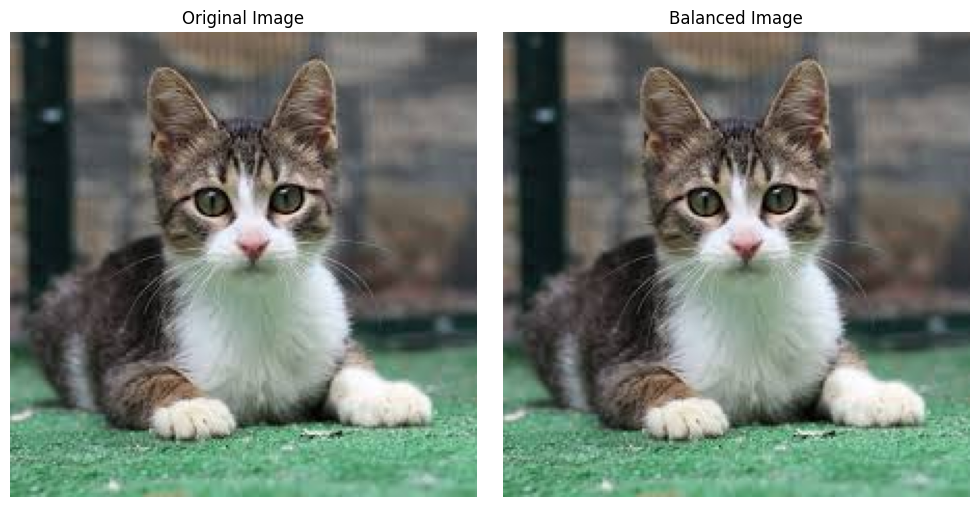

In [32]:
def white_patch_balance(img_rgb):
  H,W,_ = img_rgb.shape
  # we need to apply the white balance . for this we need to find the max value of each rgb channel

  #first we will convert the image to float for calculations
  img_float=img_rgb.astype(np.float32)

  # now we will find the max values for each rgb channel
  r_max=np.max(img_float[:,:,0])
  g_max=np.max(img_float[:,:,1])
  b_max=np.max(img_float[:,:,2])

  #scale the values

  scale_r=255.0/r_max
  scale_g=255.0/g_max
  scale_b=255.0/b_max

  # will find the balanced values by multiplying the scaling factors

  balanced_r=img_float[:,:,0]*scale_r
  balanced_g=img_float[:,:,1]*scale_g
  balanced_b=img_float[:,:,2]*scale_b

   #Clip values to [0, 255] and convert back to uint8
  balanced_r = np.clip(balanced_r, 0, 255).astype(np.uint8)
  balanced_g = np.clip(balanced_g, 0, 255).astype(np.uint8)
  balanced_b = np.clip(balanced_b, 0, 255).astype(np.uint8)

    # Combine channels
  img_balanced = np.stack([balanced_r, balanced_g, balanced_b], axis=2)

  return img_balanced

img_balanced = white_patch_balance(rgb_img)


#display the results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_balanced)
plt.title("Balanced Image")
plt.axis("off")

plt.tight_layout()
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

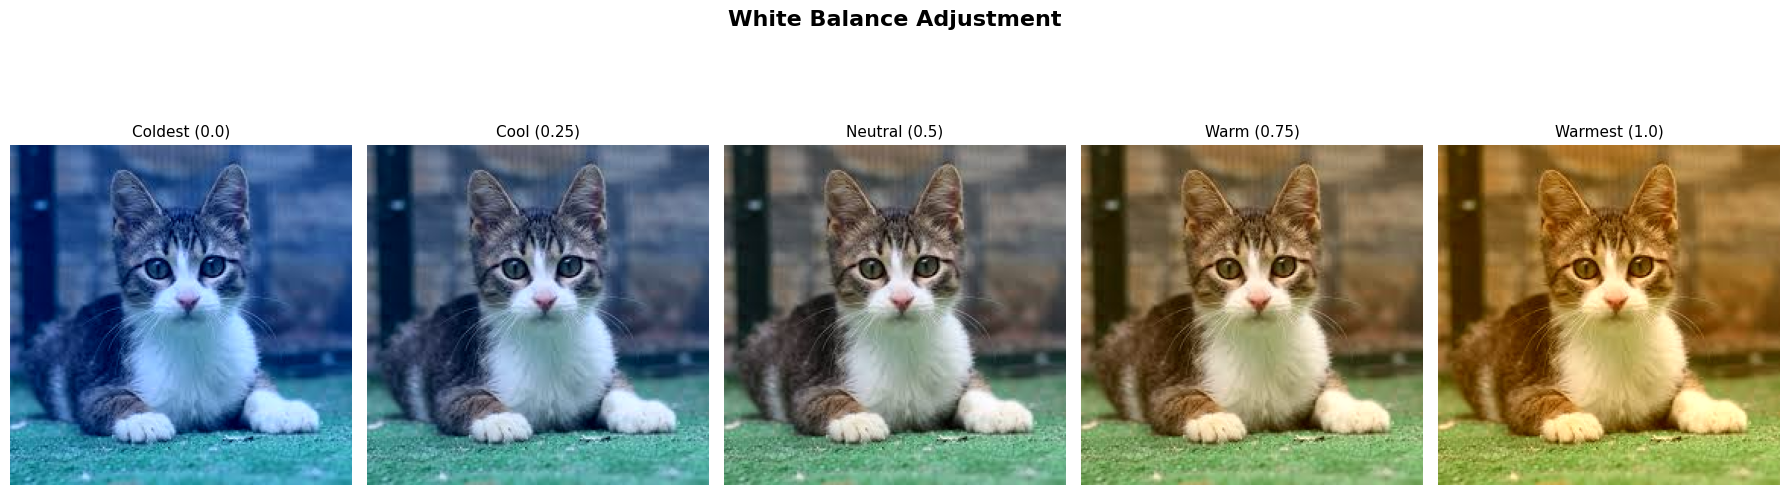

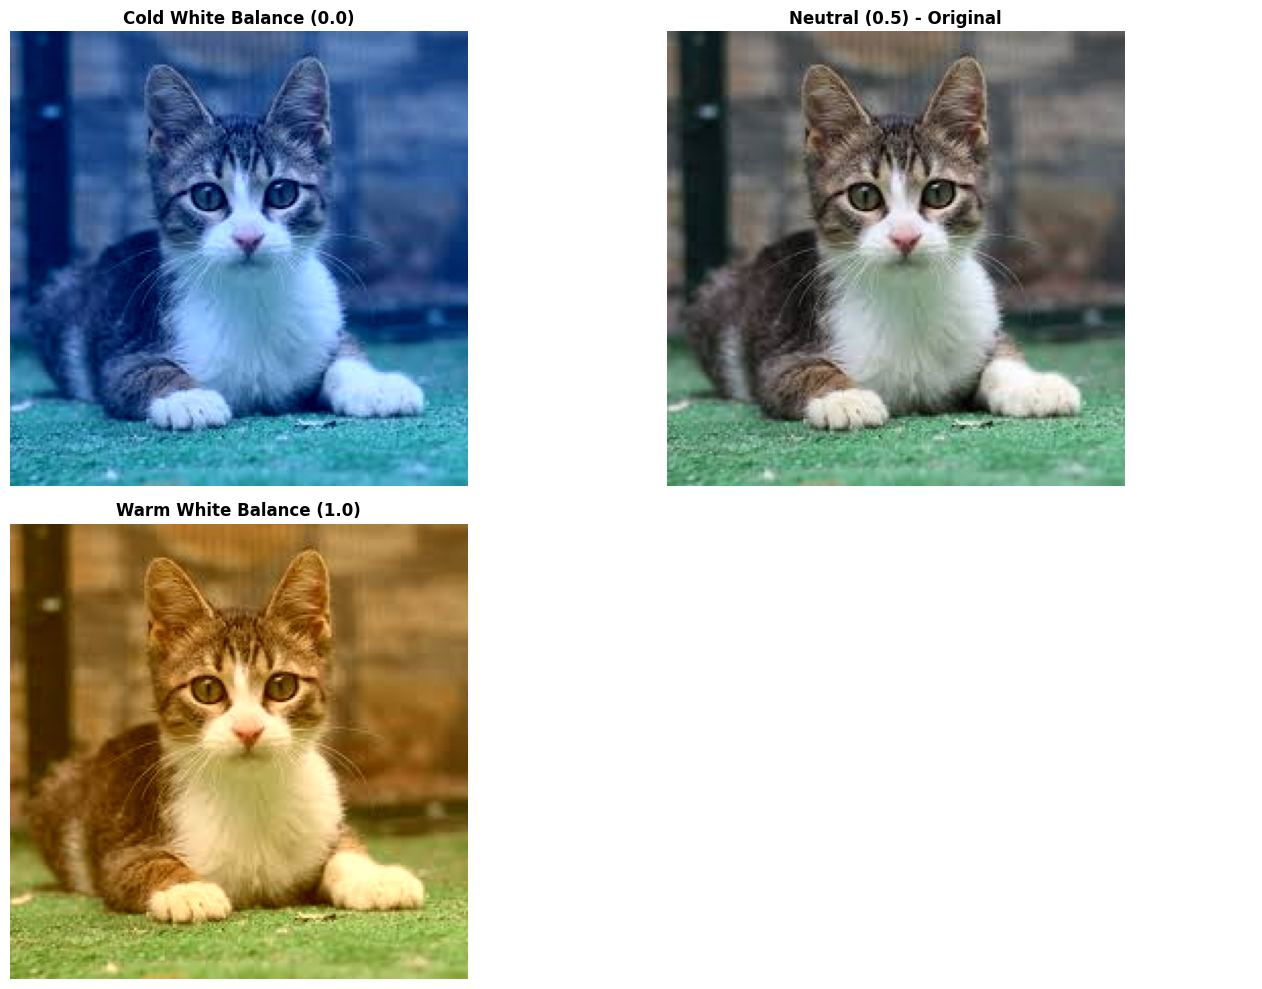

In [38]:
# --- White Balance Function (same as yours) ---
def white_balance(img_rgb, value):
    value = np.clip(value, 0.0, 1.0)
    img_float = img_rgb.astype(np.float32)

    adjustment = (value - 0.5) * 200   # [-100, +100]

    r_adjusted = img_float[:, :, 0] + adjustment * 0.5
    g_adjusted = img_float[:, :, 1] + adjustment * 0.1
    b_adjusted = img_float[:, :, 2] - adjustment * 0.5

    r_adjusted = np.clip(r_adjusted, 0, 255)
    g_adjusted = np.clip(g_adjusted, 0, 255)
    b_adjusted = np.clip(b_adjusted, 0, 255)

    return np.stack([
        r_adjusted.astype(np.uint8),
        g_adjusted.astype(np.uint8),
        b_adjusted.astype(np.uint8)
    ], axis=2)


# 1) Show 5 white-balance results (proper grid 1×5)

values = [0.0, 0.25, 0.5, 0.75, 1.0]
titles = ["Coldest (0.0)", "Cool (0.25)", "Neutral (0.5)",
          "Warm (0.75)", "Warmest (1.0)"]

fig, axes = plt.subplots(1, 5, figsize=(18, 6))
fig.suptitle("White Balance Adjustment", fontsize=16, fontweight="bold")

for idx, (val, title) in enumerate(zip(values, titles)):
    result = white_balance(rgb_img, val)
    axes[idx].imshow(result)
    axes[idx].set_title(title, fontsize=11)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


# 2) Show side-by-side comparison in 2×2 grid

cold_img = white_balance(rgb_img, 0.0)
neutral_img = white_balance(rgb_img, 0.5)
warm_img = white_balance(rgb_img, 1.0)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left
axes[0, 0].imshow(cold_img)
axes[0, 0].set_title("Cold White Balance (0.0)", fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Top-right
axes[0, 1].imshow(neutral_img)
axes[0, 1].set_title("Neutral (0.5) - Original", fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Bottom-left
axes[1, 0].imshow(warm_img)
axes[1, 0].set_title("Warm White Balance (1.0)", fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

# Bottom-right empty (optional)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
"""
Apply white balance correction based on temperature value.

    Algorithm: Kelvin temperature-based RGB adjustment
    - value = 0.0: Coldest (most blue, ~3000K - Incandescent)
    - value = 0.5: Neutral (original image, ~6500K - Daylight)
    - value = 1.0: Warmest (most red-yellow, ~9000K - Warm light)

    The adjustment shifts Red and Blue channels based on color temperature,
    while keeping Green relatively neutral, similar to phone camera white balance.

    Input:
        img_rgb: 0-255 RGB image
        value: 0.0-1.0 (0=cold, 0.5=neutral, 1.0=warm)
    Output:
        0-255 white balanced RGB image
    """